In [1]:
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
import pickle
from joblib import dump, load

In [2]:
df = pd.read_csv('BTC2019-2024.csv')
df1 = df.reset_index()['Open']

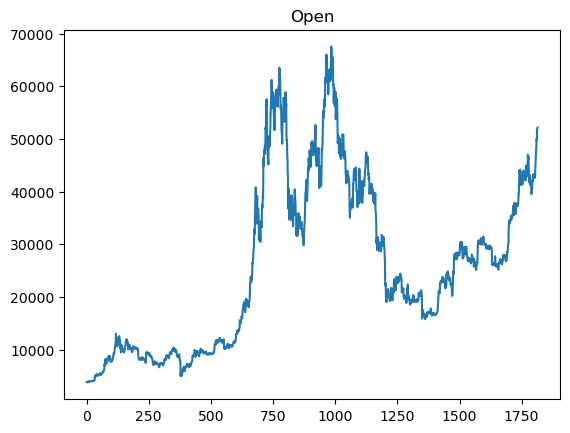

In [3]:
plt.plot(df1)
plt.title("Open")
plt.show()

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [5]:
train_size = int(0.6 * len(df))
test_size = int(0.4 * len(df))


train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]


In [6]:
# 5. Tạo dataset cho mô hình
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [7]:
X_train.shape

(988, 100)

### RandomForest

In [8]:
model=RandomForestRegressor()

In [9]:
# best_parameters

In [10]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [11]:
# Lưu mô hình vào file
with open('Model/rf.pkl', 'wb') as file:
    pickle.dump(model, file)

In [12]:
# Tải mô hình từ file
with open('Model/rf.pkl', 'rb') as file:
    rf_model = pickle.load(file)

In [13]:
train_predict = rf_model.predict(X_train)
y_pred = rf_model.predict(X_test)


In [14]:
y_pred

array([0.44798226, 0.4464551 , 0.44457283, 0.44300611, 0.44289488,
       0.44274475, 0.44509472, 0.44403474, 0.44384415, 0.44434   ,
       0.44318296, 0.44330575, 0.43588236, 0.43410969, 0.4298191 ,
       0.42952192, 0.42645413, 0.42264341, 0.41790436, 0.41869362,
       0.41734248, 0.41779977, 0.41574535, 0.41463245, 0.41436142,
       0.41358392, 0.41338824, 0.41239272, 0.40640061, 0.4033014 ,
       0.40208113, 0.40325088, 0.40108804, 0.40251463, 0.40187141,
       0.40232688, 0.40405261, 0.40707343, 0.40520548, 0.40322912,
       0.4042453 , 0.4022293 , 0.40003723, 0.4000494 , 0.40147925,
       0.40146548, 0.40146548, 0.40135102, 0.40153754, 0.40368468,
       0.40657381, 0.40803493, 0.4061436 , 0.40507151, 0.40505785,
       0.40275186, 0.40330569, 0.40259575, 0.40472848, 0.40792625,
       0.41376498, 0.41323939, 0.41470748, 0.4122388 , 0.41441699,
       0.4150832 , 0.41470841, 0.41107638, 0.413446  , 0.41684222,
       0.41701386, 0.41812254, 0.41714207, 0.41488119, 0.41414

In [15]:
# 11. Dự báo giá cho 30 ngày tiếp theo
x_input = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input[0])
lst_output = []
n_steps = 100
i = 0
while i < 30:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps))
        yhat = rf_model.predict(x_input)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, n_steps))
        yhat = rf_model.predict(x_input)
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        i += 1

lst_output = np.array(lst_output).reshape(-1, 1)

### Bagging

In [16]:
from sklearn.ensemble import BaggingRegressor

In [17]:
# Xây dựng mô hình Bagged
bagged_rf = BaggingRegressor(estimator=rf_model, n_estimators=5, random_state=42)

In [18]:
# Huấn luyện mô hình
bagged_rf.fit(X_train, y_train)

BaggingRegressor(estimator=RandomForestRegressor(), n_estimators=5,
                 random_state=42)

In [19]:
#Lưu mô hình
dump(bagged_rf, 'Model/rf_bagging.joblib')

['Model/rf_bagging.joblib']

In [20]:
# Tải mô hình
bagged_rf = load('Model/rf_bagging.joblib')

In [21]:
#Dự đoán
bagged_train_predict = bagged_rf.predict(X_train)
bagged_y_pred = bagged_rf.predict(X_test)

In [22]:
bagged_y_pred

array([0.44637641, 0.4407487 , 0.44062388, 0.43958359, 0.43908758,
       0.43968903, 0.44289963, 0.44089483, 0.43964075, 0.43984125,
       0.4394122 , 0.43872979, 0.43600199, 0.43352184, 0.43203384,
       0.43022952, 0.42847733, 0.42529557, 0.42262581, 0.42062746,
       0.42007619, 0.41856429, 0.41675995, 0.41589917, 0.41520772,
       0.41480749, 0.41368565, 0.41256844, 0.40977056, 0.40733372,
       0.40562121, 0.4034784 , 0.40359511, 0.40399121, 0.40222184,
       0.40211285, 0.40361499, 0.40449243, 0.40585076, 0.40542014,
       0.4048695 , 0.40374071, 0.40114031, 0.40106999, 0.40073588,
       0.40072586, 0.40279286, 0.40278334, 0.40399006, 0.40484302,
       0.40681836, 0.40764688, 0.40773691, 0.40707874, 0.40561465,
       0.4054679 , 0.40470762, 0.40609441, 0.40700367, 0.40895177,
       0.41052896, 0.41269794, 0.41375276, 0.41465266, 0.41558322,
       0.41529429, 0.41586658, 0.41583537, 0.41612772, 0.41504067,
       0.4161835 , 0.41693017, 0.41697731, 0.41659699, 0.41656

In [23]:
# 11. Dự báo giá cho 30 ngày tiếp theo
x_input1 = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input1[0])
bagg_lst_output1 = []
n_steps = 100
i = 0
while i < 30:
    if len(temp_input) > 100:
        x_input1 = np.array(temp_input[1:])
        x_input1 = x_input1.reshape(1, -1)
        x_input1 = x_input1.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input1)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        bagg_lst_output1.extend(yhat.tolist())
        i += 1
    else:
        x_input1 = x_input1.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input1)
        temp_input.extend(yhat.tolist())
        bagg_lst_output1.extend(yhat.tolist())
        i += 1

bagg_lst_output1 = np.array(bagg_lst_output1).reshape(-1, 1)


In [24]:
# 11. Dự báo giá cho 60 ngày tiếp theo
x_input2 = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input2[0])
bagg_lst_output2 = []
n_steps = 100
i = 0
while i < 60:
    if len(temp_input) > 100:
        x_input2 = np.array(temp_input[1:])
        x_input2 = x_input2.reshape(1, -1)
        x_input2 = x_input2.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input2)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        bagg_lst_output2.extend(yhat.tolist())
        i += 1
    else:
        x_input2 = x_input2.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input2)
        temp_input.extend(yhat.tolist())
        bagg_lst_output2.extend(yhat.tolist())
        i += 1

bagg_lst_output2 = np.array(bagg_lst_output2).reshape(-1, 1)

In [25]:
# 11. Dự báo giá cho 90 ngày tiếp theo
x_input3 = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input3[0])
bagg_lst_output3 = []
n_steps = 100
i = 0
while i < 90:
    if len(temp_input) > 100:
        x_input3 = np.array(temp_input[1:])
        x_input3 = x_input3.reshape(1, -1)
        x_input3 = x_input3.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input3)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        bagg_lst_output3.extend(yhat.tolist())
        i += 1
    else:
        x_input3 = x_input3.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input3)
        temp_input.extend(yhat.tolist())
        bagg_lst_output3.extend(yhat.tolist())
        i += 1

bagg_lst_output3 = np.array(bagg_lst_output3).reshape(-1, 1)

### Đánh giá mô hình

In [26]:
#Đánh giá trên tập test
print("Chỉ số MSE trên tập test")
print("Random Forest:", round(metrics.mean_squared_error(y_test, y_pred), 4))
print("Bagging:", round(metrics.mean_squared_error(y_test, bagged_y_pred), 4))
test_rmse = np.sqrt(np.mean((bagged_y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# Tính MAPE
test_mape = np.mean(np.abs((bagged_y_pred - y_test) / y_test)) * 100
print('Testing MAPE:', test_mape)

Chỉ số MSE trên tập test
Random Forest: 0.0109
Bagging: 0.0106
Testing RMSE: 0.1029453247947254
Testing MAPE: 31.10949698614835


### Trực quan

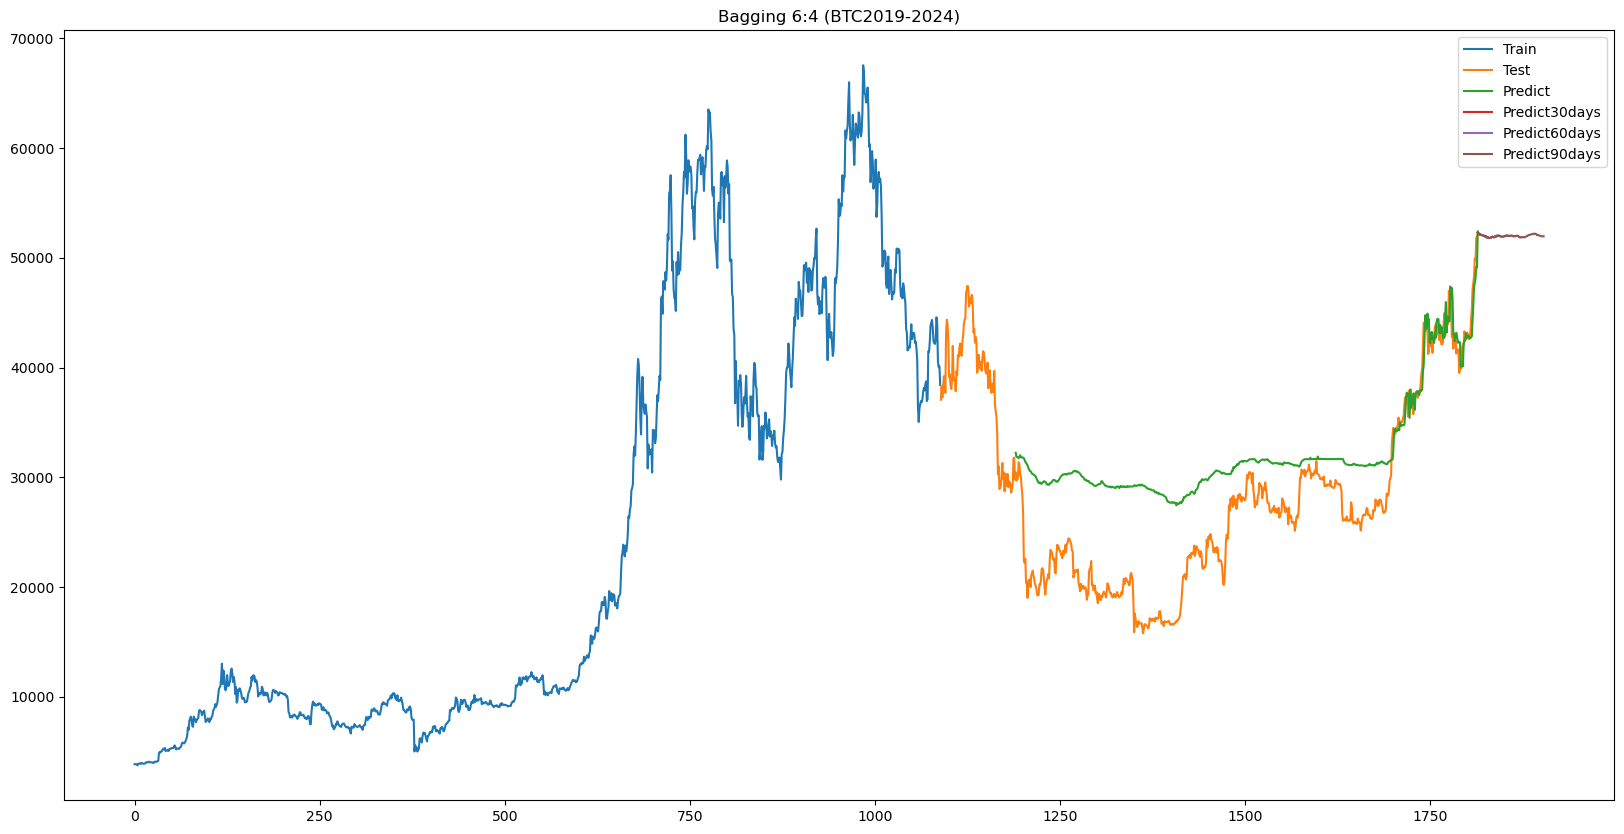

In [27]:
plt.figure(figsize=(20, 10))

plt.title('Bagging 6:4 (BTC2019-2024)')
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(bagged_y_pred.reshape(-1,1)))
prediect_data_index1 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index1,scaler.inverse_transform(bagg_lst_output1))
prediect_data_index2 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index2,scaler.inverse_transform(bagg_lst_output2))
prediect_data_index3 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index3,scaler.inverse_transform(bagg_lst_output3))
plt.legend(['Train','Test','Predict','Predict30days','Predict60days','Predict90days'])
plt.show()